# HW0
## Yarou Xu

#### 1.1 Use LASSO regression to predict Salary from the other numeric predictors (you should omit the categorical predictors). 
##### 1.1.1. Create a visualization of the coefficient trajectories

C:\Users\47532\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


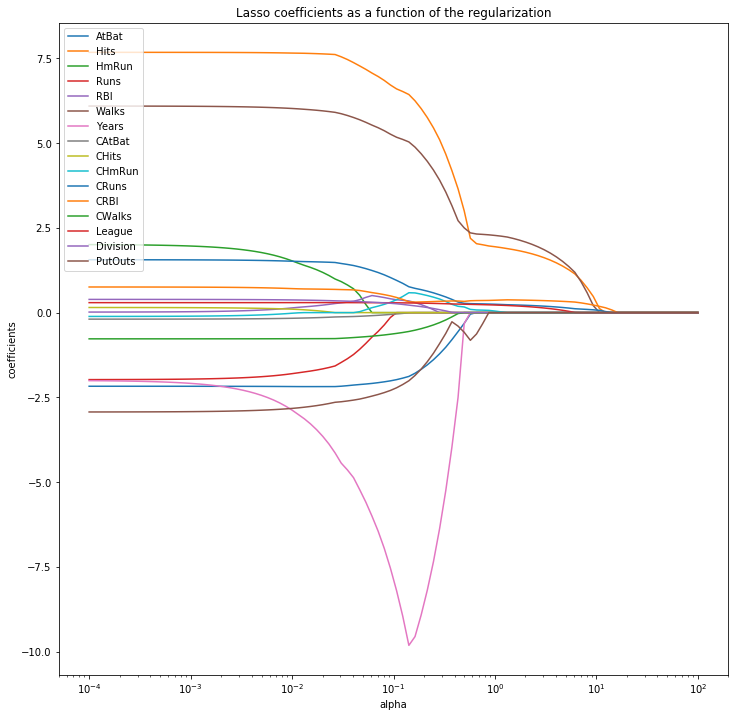

In [19]:
import pandas as pd
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt
# Load the data
hitters = pd.read_csv('Hitters.csv')
# remove categorical predictors
hitters = hitters.iloc[:,1:20].drop(['League', 'Division'], axis=1)
# remove missing values
hitters = hitters.dropna(axis=0)

# compute coefficients
n_alphas = 100
alphas_lasso = np.logspace(-4, 2, n_alphas)
coefs = []
for a in alphas_lasso:
    lasso = Lasso(alpha=a, normalize=True)
    lasso.fit(hitters.iloc[:,:16],hitters['Salary'])
    coefs.append(lasso.coef_)
    
# display results
plt.figure(figsize=(12,12))
ax = plt.gca()
lines = ax.plot(alphas_lasso, coefs)
ax.set_xscale('log')
ax.legend(lines,['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','League','Division','PutOuts','Assists','Errors'], loc= 2)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.show()

##### 1.1.2. Comment on which are the final three predictors that remain in the model

In [21]:
alphas1 = np.logspace(0.9, 1, 10)
coefs1 = []
for a in alphas1:
    lasso = Lasso(alpha=a, normalize=True)
    lasso.fit(hitters.iloc[:,:16],hitters['Salary'])
    coefs1.append(lasso.coef_)
coefs1

[array([ 0.        ,  0.76536664,  0.        ,  0.        ,  0.        ,
         0.63560277,  0.        ,  0.        ,  0.        ,  0.        ,
         0.09585511,  0.26220583,  0.        ,  0.        ,  0.        ,
        -0.        ]),
 array([ 0.        ,  0.72187591,  0.        ,  0.        ,  0.        ,
         0.57145938,  0.        ,  0.        ,  0.        ,  0.        ,
         0.0939162 ,  0.25641931,  0.        ,  0.        ,  0.        ,
        -0.        ]),
 array([0.        , 0.67726034, 0.        , 0.        , 0.        ,
        0.5056675 , 0.        , 0.        , 0.        , 0.        ,
        0.09190412, 0.25050469, 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.63148634, 0.        , 0.        , 0.        ,
        0.4381566 , 0.        , 0.        , 0.        , 0.        ,
        0.08986335, 0.24441443, 0.        , 0.        , 0.        ,
        0.        ]),
 array([0.        , 0.5845283 , 0.        , 0.        , 0.      

In [ ]:
The final three predictors that remain in the model are 'Hits', 'CRuns', 'CRBI'.

##### 1.1.3. Use cross-validation to find the optimal value of the regularization penalty

In [15]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=10,normalize=True)
lassocv.fit(hitters.iloc[:,:16],hitters['Salary'])
lassocv.alpha_

0.061359072734131756

##### 1.1.4. How many predictors are left in that model?

In [29]:
lasso = Lasso(alpha=lassocv.alpha_, normalize=True)
lasso.fit(hitters.iloc[:,:16],hitters['Salary'])
print(lasso.coef_)
print('There are 14 predictors are left in that model.')

[-2.08817068  7.06514527  0.         -0.72241273  0.50308292  5.53015254
 -6.00243771 -0.08950015  0.          0.14560169  1.24229174  0.59048231
 -0.6945495   0.29285387  0.3064802  -2.46226144]
There are 14 predictors are left in that model.


#### 1.2 Repeat with Ridge Regression. 
##### 1.2.1 Visualize the coefficient trajectories

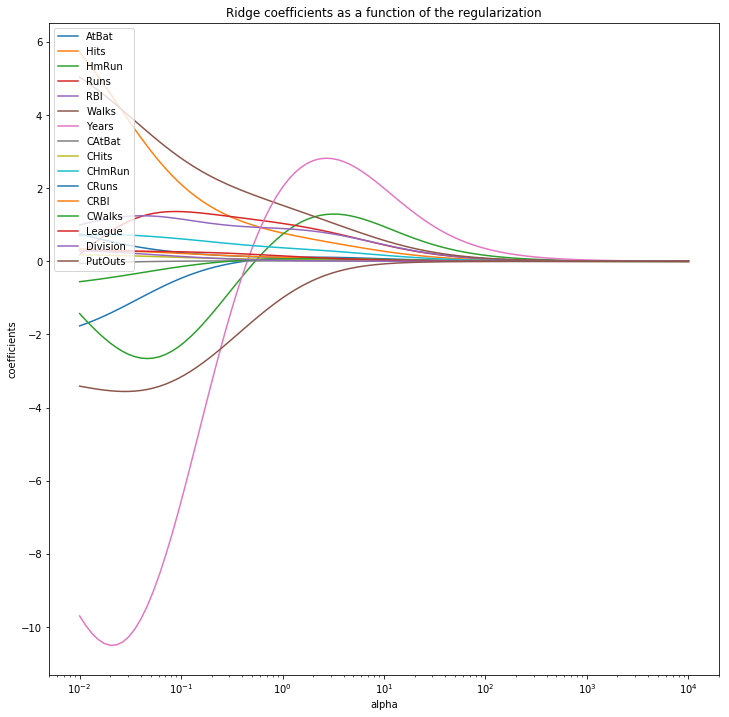

In [26]:
from sklearn.linear_model import Ridge
# compute coefficients
n_alphas = 100
alphas_ridge = np.logspace(-2, 4, n_alphas)
coefs = []
for a in alphas_ridge:
    ridge = Ridge(alpha=a, normalize=True)
    ridge.fit(hitters.iloc[:,:16],hitters['Salary'])
    coefs.append(ridge.coef_)
    
# display results
plt.figure(figsize=(12,12))
ax = plt.gca()
lines = ax.plot(alphas_ridge, coefs)
ax.set_xscale('log')
ax.legend(lines,['AtBat','Hits','HmRun','Runs','RBI','Walks','Years','CAtBat','CHits','CHmRun','CRuns','CRBI','CWalks','League','Division','PutOuts','Assists','Errors'], loc= 2)
plt.xlabel('alpha')
plt.ylabel('coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.show()

##### 1.2.2 Use cross-validation to find the optimal value of the regularization penalty

In [31]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(alphas = alphas_ridge, cv=10, normalize=True)
ridgecv.fit(hitters.iloc[:,:16],hitters['Salary'])
ridgecv.alpha_

1.0

#### 2.1 Explain in your own words the bias-variance tradeoff
When fit several models for a same dataset, for each model, its bias and variance can not reach minimum at the same time. When the model has higher variance, it is always very flexible to follow all data points , and result in low bias. And vice versa.

##### 2.2 What role does regularization play in this tradeoff? 
The regularization in the a predictive model will penalize higer degree polynomials. Therefore it helps to reduce the variance of the estimator, and sacrify some bias to get the optimal compromise point from the bias-variance tradeoff for the prediction model. 

##### 2.3 Make reference to your findings in number (1) to describe models of high/low bias and variance


C:\Users\47532\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


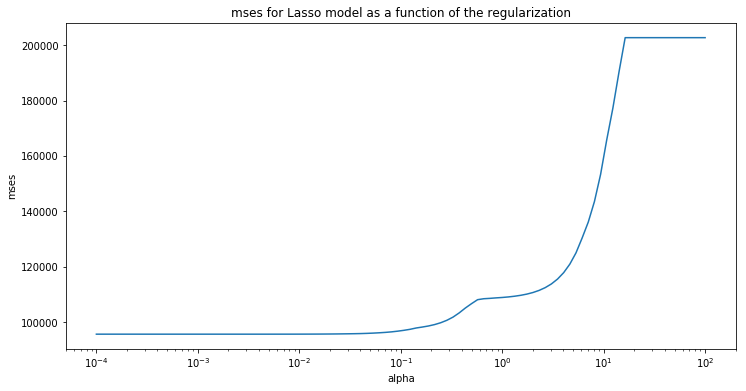

In [42]:
# Compute the mse for lasso model
mses = []
for a in alphas_lasso:
    lasso = Lasso(alpha=a, normalize=True)
    lasso.fit(hitters.iloc[:,:16],hitters['Salary'])
    mse = np.mean((hitters['Salary']-lasso.predict(hitters.iloc[:,:16]))**2)
    mses.append(mse)

# display results
plt.figure(figsize=(12,6))
ax = plt.gca()
lines = ax.plot(alphas_lasso, mses)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('mses')
plt.title('mses for Lasso model as a function of the regularization')
plt.show()

From the above plot we can find out that the bias of this Lasso model is increasing as alpha increasing. And from the previous coefficient trajectories of Lasso model, we can find out that the number of predictors is decreasing as the alpha increasing. Therefore, it means that when the model has more predictors, its variance is larger, but its bias is much lower. And when the model contains less predictors, it has lower variance, but will cause higher bias. This is perfectly consistent with the bias-variance tradeoff.